<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/NLP_02(tfds_but_break_up_to_see_details%2C_simple_model_beat_complex_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
(train_set, test_set), info = tfds.load('imdb_reviews',
                                        split=['train', 'test'],
                                        as_supervised=True,
                                        with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBMJSHG/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBMJSHG/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBMJSHG/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
for ele in train_set.take(1):
  print(ele)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [4]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [5]:
train_df = tfds.as_dataframe(train_set, info)
test_df = tfds.as_dataframe(test_set, info)

In [6]:
train_df.head()

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [7]:
train_df.at[0, 'text']

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [8]:
X_train = train_df['text']
y_train = train_df['label']

In [9]:
X_train

0        b"This was an absolutely terrible movie. Don't...
1        b'I have been known to fall asleep during film...
2        b'Mann photographs the Alberta Rocky Mountains...
3        b'This is the kind of film for a snowy Sunday ...
4        b'As others have mentioned, all the women that...
                               ...                        
24995    b'I have a severe problem with this show, seve...
24996    b'The year is 1964. Ernesto "Che" Guevara, hav...
24997    b'Okay. So I just got back. Before I start my ...
24998    b'When I saw this trailer on TV I was surprise...
24999    b'First of all, Riget is wonderful. Good comed...
Name: text, Length: 25000, dtype: object

458


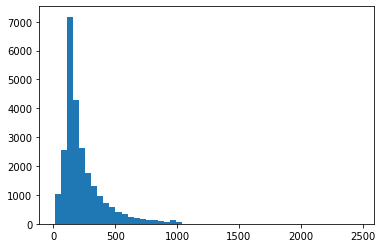

In [10]:
sentences_length = [len(sentences.split()) for sentences in train_df['text'].to_list()]
plt.hist(sentences_length, bins=50)
output_sen_len = int(np.percentile(sentences_length, 90))
print(output_sen_len)

In [11]:
max_tokens = 68000
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                           output_sequence_length=output_sen_len)
text_vectorizer.adapt(X_train)

In [12]:
text_vectorizer(X_train[1])

<tf.Tensor: shape=(458,), dtype=int64, numpy=
array([   10,    26,    75,   617,     6,   776,  2355,   299,    95,
          19,    11,     7,   604,   662,     6,     4,  2129,     5,
         180,   571,    63,  1403,   107,  2410,     3,  3905,    21,
           2, 38136,     3,   252,    41,  4781,     4,   169,   186,
          21,    11,  4259,    10,  1507,  2355,    80,     2,    20,
          14,  1973,     2,   114,   943,    14,  1740,  1300,   594,
           3,   356,   180,   446,     6,   596,    19,    17,    57,
        1775,     5,    49,    14,  4002,    98,    42,   134,    10,
         934,    10,   194,    26,  1026,   171,     5,     2,    20,
          19,    10,   284,     2,  2065,     5,     9,     3,   279,
          41,   446,     6,   596,     5,    30,   200, 36551,   201,
          99,   146,  4525,    16,   229,   329,    10,   175,   368,
          11,    20,    31,    32,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [13]:
text_vectorizer.get_vocabulary()[:5], text_vectorizer.get_vocabulary()[-5:]

(['', '[UNK]', 'the', 'and', 'a'],
 ['stiffnecked', 'stifflimbed', 'stifflers', 'stifflegged', 'stiffjeanpierre'])

In [14]:
train_dataset = train_set.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_set.batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
vocab_size = len(text_vectorizer.get_vocabulary())
embedding_dims = 128
cnn_filters = 64
kernel_size = 5
output_dims = 1
LSTM_units = 64

In [ ]:
# model = tf.keras.Sequential([
#   tf.keras.Input(shape=(1,), dtype='string'),
#   text_vectorizer,
#   layers.Embedding(input_dim=vocab_size,
#                    output_dim=embedding_dims),
#   layers.Conv1D(filters=64,
#                 kernel_size=5,
#                 padding='same',
#                 activation='relu'),
#   layers.GlobalAveragePooling1D(),
#   layers.Dense(units=output_dims, activation='sigmoid')
# ])
# model.summary()

In [17]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1,), dtype='string'),
  text_vectorizer,
  layers.Embedding(input_dim=vocab_size,
                   output_dim=embedding_dims,
                   mask_zero=True),
  layers.Bidirectional(layers.LSTM(units=LSTM_units,
                                   return_sequences=True)),
  layers.Bidirectional(layers.LSTM(units=LSTM_units,
                                   return_sequences=True)),                             
  layers.GlobalMaxPooling1D(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(units=output_dims, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 458)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 458, 128)          8704000   
                                                                 
 bidirectional (Bidirectiona  (None, 458, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 458, 128)         98816     
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset,
                    epochs=5,
                    steps_per_epoch=int(0.1*len(train_dataset)),
                    validation_data=test_dataset,
                    validation_steps=int(0.1*len(test_dataset)))

Epoch 1/5
78/78 [==============================] - 32s 176ms/step - loss: 0.5912 - accuracy: 0.6591 - val_loss: 0.4127 - val_accuracy: 0.8157
Epoch 2/5
78/78 [==============================] - 9s 120ms/step - loss: 0.4312 - accuracy: 0.8145 - val_loss: 0.3579 - val_accuracy: 0.8442
Epoch 3/5
78/78 [==============================] - 9s 120ms/step - loss: 0.3358 - accuracy: 0.8606 - val_loss: 0.3749 - val_accuracy: 0.8325
Epoch 4/5
78/78 [==============================] - 9s 120ms/step - loss: 0.3294 - accuracy: 0.8566 - val_loss: 0.3289 - val_accuracy: 0.8606
Epoch 5/5
78/78 [==============================] - 9s 120ms/step - loss: 0.3226 - accuracy: 0.8674 - val_loss: 0.3173 - val_accuracy: 0.8634


In [20]:
model.evaluate(test_dataset)

782/782 [==============================] - 29s 37ms/step - loss: 0.3252 - accuracy: 0.8602


[0.3251948952674866, 0.8602399826049805]

In [24]:
model_2 = tf.keras.Sequential([
  tf.keras.Input(shape=(1,), dtype='string'),
  text_vectorizer,
  layers.Embedding(input_dim=vocab_size,
                   output_dim=16),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1)
])
    
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 458)              0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 458, 16)           1088000   
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [25]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [26]:
history_2 = model_2.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 0.8968 - acc: 0.5210 - val_loss: 0.6445 - val_acc: 0.8432
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.5182 - acc: 0.7455 - val_loss: 0.3956 - val_acc: 0.8670
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3530 - acc: 0.8732 - val_loss: 0.3698 - val_acc: 0.8859
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2724 - acc: 0.9130 - val_loss: 0.4115 - val_acc: 0.8886
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2289 - acc: 0.9368 - val_loss: 0.4874 - val_acc: 0.8876
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.2124 - acc: 0.9462 - val_loss: 0.5121 - val_acc: 0.8867
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1998 - acc: 0.9523 - val_loss: 0.5447 - val_acc: 0.8837
Epoch 8/10
782/782 [==============================] - 10s 12ms